# Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [ ]:
# Import the packages that we will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Importing data

In [ ]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/MyDrive/cartwheel.csv"

else:
    # Define path del proyecto
    Ruta            = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# url string that hosts our .csv file
url = "/content/drive/MyDrive/cartwheel.csv"

# Read the .csv file and store it as a pandas Data Frame
df = pd.read_csv(url)
df


,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56.0,F,1,Y,1,62.00,61.0,79,Y,1.0,7
1,2,26.0,F,1,Y,1,62.00,60.0,70,Y,1.0,8
2,3,33.0,F,1,Y,1,66.00,64.0,85,Y,1.0,7
3,4,39.0,F,1,N,0,64.00,63.0,87,Y,1.0,10
4,5,27.0,M,2,N,0,73.00,75.0,72,N,0.0,4
5,6,24.0,M,2,N,0,75.00,71.0,81,N,0.0,3
6,7,28.0,M,2,N,0,75.00,76.0,107,Y,1.0,10
7,8,22.0,F,1,N,0,65.00,62.0,98,Y,1.0,9
8,9,29.0,M,2,Y,1,74.00,73.0,106,N,0.0,5
9,10,33.0,F,1,Y,1,63.00,60.0,65,Y,1.0,8


# Exploring the content of the data set

Get a general 'feel' of the data


In [ ]:
# Print the number of rows
n_rows = df.shape[0]
print(f"Number of rows: {n_rows}")
# Print the number of columns
n_columns = df.shape[1]
print(f"Number of columns: {n_columns}")
print(df.shape)


Number of rows: 52
Number of columns: 12
(52, 12)


# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [ ]:
# Number of times that each distinct value of a variable occurs in a data set



# Generate a frequency table for the 'Gender' column
gender_freq = df['Gender'].value_counts()

print(gender_freq)

Gender
F    26
M    26
Name: count, dtype: int64


In [ ]:
# Proportion of each distinct value of a variable occurs in a data set
gender_proportions = df['Gender'].value_counts(normalize=True)

print(gender_proportions)


Gender
F    0.5
M    0.5
Name: proportion, dtype: float64


Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [ ]:
# Total number of observations

total_observations = df.shape[0]
print("Total number of observations:", total_observations)


# total number of null observations in Age

null_observations = df['Age'].isna().sum()
print("Number of missing values in 'Age':", null_observations)



# Total number of counts in Age (excluding missing values)

non_null_observations = df['Age'].count()
print("Number of non-missing values in 'Age':", non_null_observations)




Total number of observations: 52
Number of missing values in 'Age': 1
Number of non-missing values in 'Age': 51


# Histogram

It is often good to get a feel for the shape of the distribution of the data.

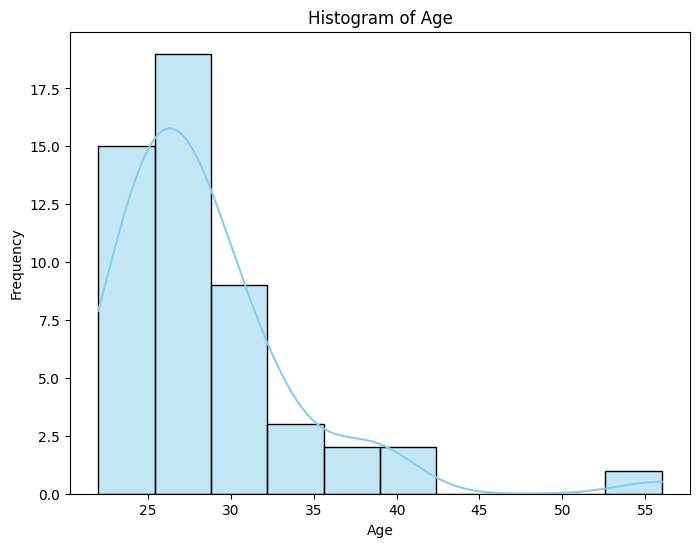

In [ ]:
# Plot histogram of Age

df = pd.DataFrame(df)

# Plotting the histogram of Age
plt.figure(figsize=(8,6))
sns.histplot(df['Age'], kde=True, bins=10, color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

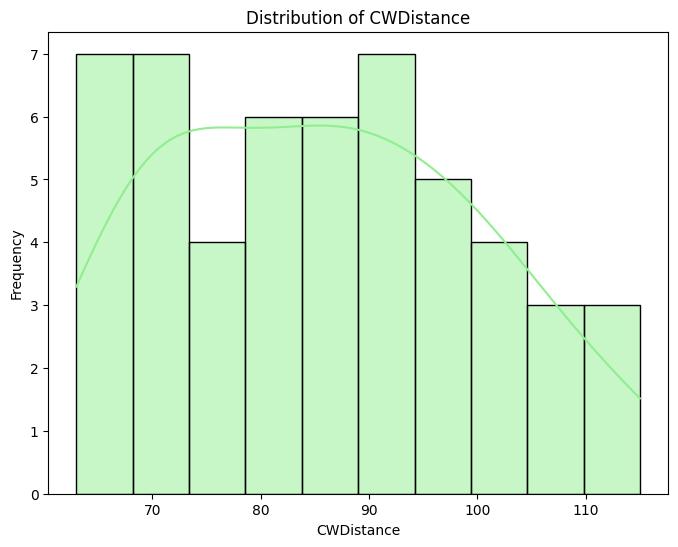

In [ ]:
# Plotting the distribution of CWDistance
plt.figure(figsize=(8,6))
sns.histplot(df['CWDistance'], kde=True, bins=10, color='lightgreen')
plt.title('Distribution of CWDistance')
plt.xlabel('CWDistance')
plt.ylabel('Frequency')

# Display the plot
plt.show()

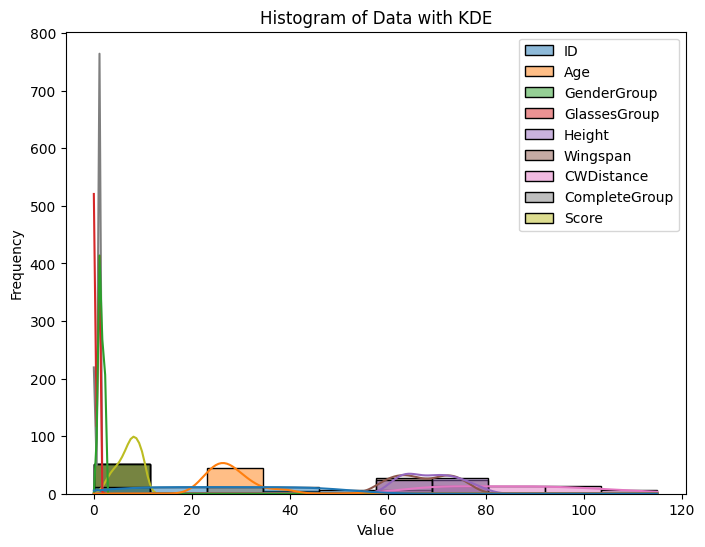

In [ ]:
#Histogram

# Plotting the histogram with Seaborn
plt.figure(figsize=(8,6))
sns.histplot(df, kde=True, bins=10, color='skyblue')
plt.title('Histogram of Data with KDE')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

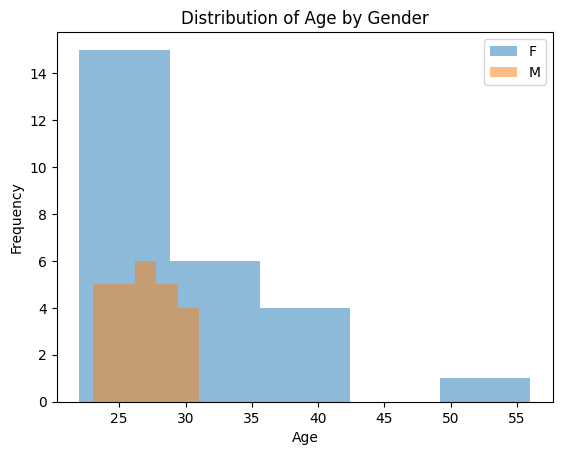

In [ ]:
# Group the data by 'Gender'
groups = df.groupby('Gender')

# Plot histograms for each group
for name, group in groups:
    plt.hist(group['Age'], bins=5, alpha=0.5, label=name)

# Add labels, title, and legend
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Gender')
plt.legend()

# Show the plot
plt.show()

# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

<ipython-input-58-a1a2bd8f2891>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='CWDistance', palette='Set2', showmeans=True,


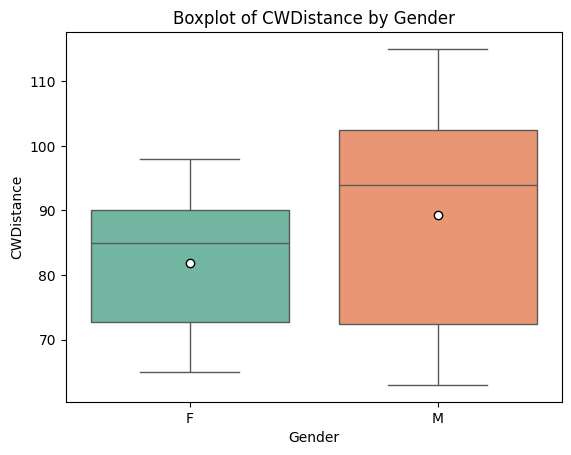

In [ ]:
# Create the boxplot of the "CWDistance"

# Create a grouped boxplot
sns.boxplot(data=df, x='Gender', y='CWDistance', palette='Set2', showmeans=True,
            meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"})

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('CWDistance')
plt.title('Boxplot of CWDistance by Gender')

# Show the plot
plt.show()


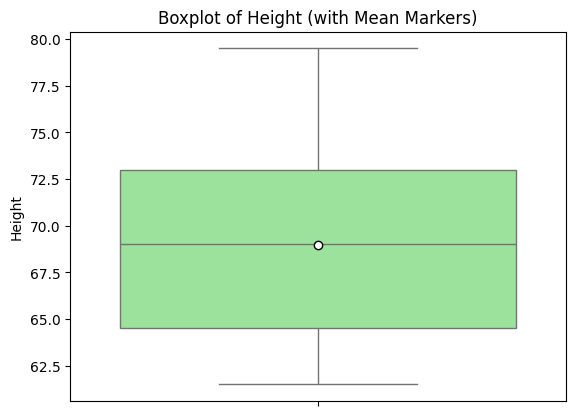

In [ ]:
# Create the boxplot of the "Height"

sns.boxplot(data=df, y='Height', color='lightgreen', showmeans=True,
            meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"})

# Add labels and title
plt.ylabel('Height')
plt.title('Boxplot of Height (with Mean Markers)')

# Show the plot
plt.show()

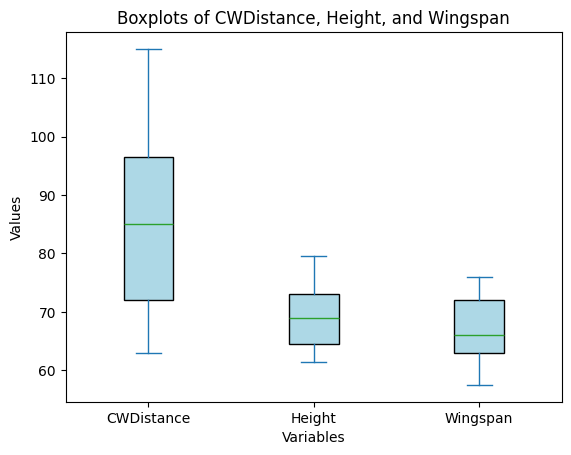

In [ ]:
# Create the boxplots of the "CWDistance", "Height" and "Wingspan"
df[['CWDistance', 'Height', 'Wingspan']].plot(kind='box', patch_artist=True,
                                              boxprops=dict(facecolor='lightblue'))

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Boxplots of CWDistance, Height, and Wingspan')

# Show the plot
plt.show()


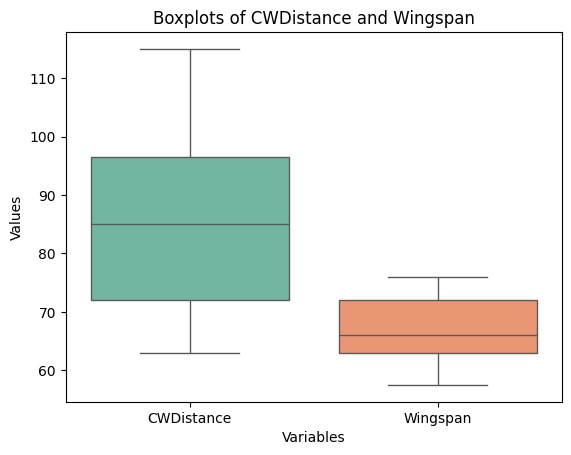

In [ ]:
# Create the boxplots of the "CWDistance" and of the "Wingspan"

sns.boxplot(data=df[['CWDistance', 'Wingspan']], palette='Set2')

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Boxplots of CWDistance and Wingspan')

# Show the plot
plt.show()

# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

<Axes: ylabel='CWDistance'>

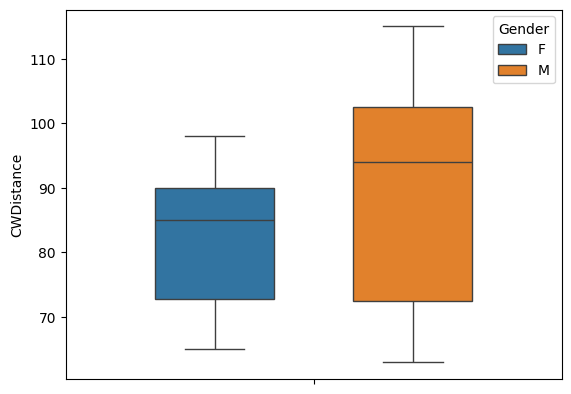

In [ ]:
# Create side-by-side boxplots of the "CWDistance" grouped by "Gender"
sns.boxplot(data=df, y='CWDistance', hue='Gender', gap=.4)



<Axes: xlabel='Glasses', ylabel='Height'>

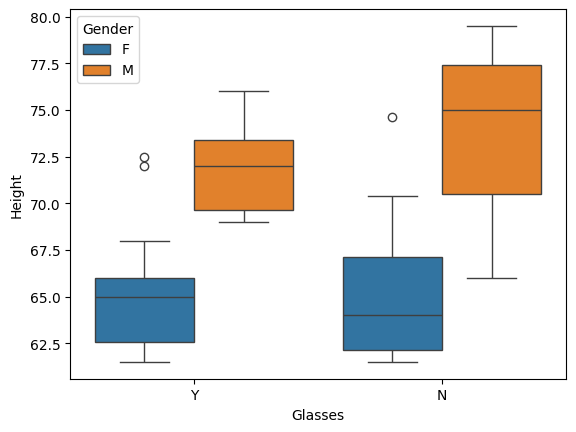

In [ ]:
# Create side-by-side boxplots of the "Glasses" grouped by "Gender"
sns.boxplot(data=df, x="Glasses", y="Height", hue="Gender")



# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


<ipython-input-79-cd92264f9505>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="GenderGroup", y="Score", data=df, palette="Set2")


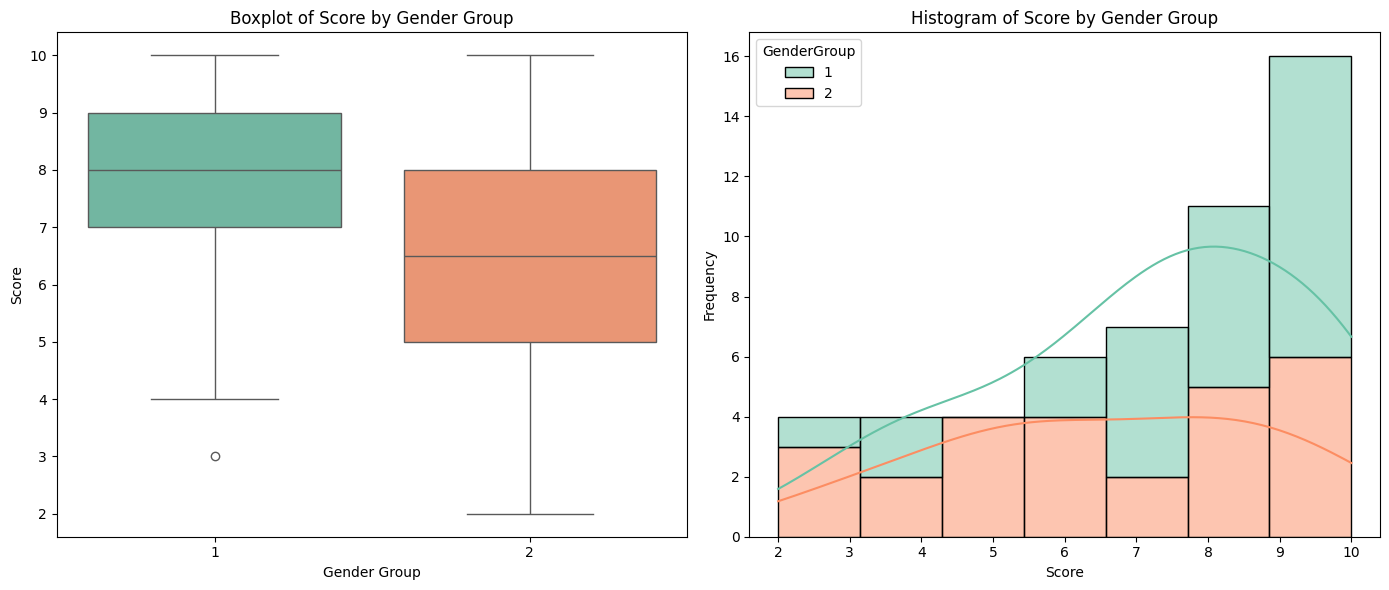

In [ ]:

plt.figure(figsize=(14, 6))

# Subplot 1: Boxplot of Score grouped by GenderGroup
plt.subplot(1, 2, 1)
sns.boxplot(x="GenderGroup", y="Score", data=df, palette="Set2")
plt.title('Boxplot of Score by Gender Group')
plt.xlabel('Gender Group')
plt.ylabel('Score')

# Subplot 2: Histogram of Score grouped by GenderGroup
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="Score", hue="GenderGroup", multiple="stack", kde=True, palette="Set2")
plt.title('Histogram of Score by Gender Group')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

# Scatter plot

Plot values of one variable versus another variable to see how they are correlated

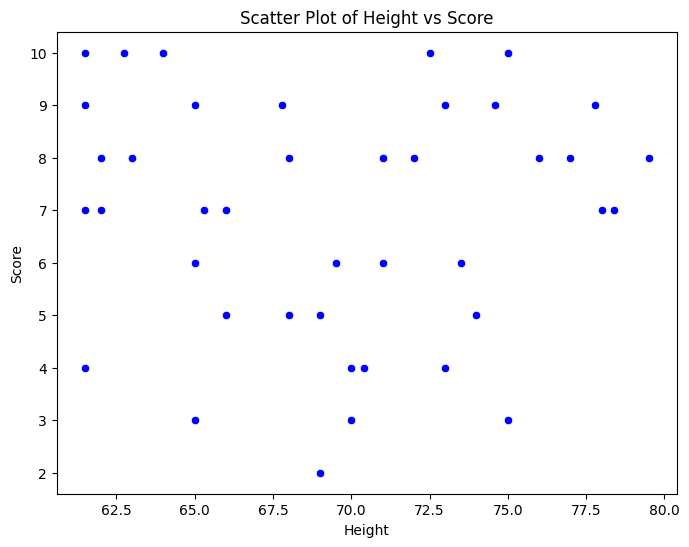

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Height", y="Score", data=df, color="blue")

# Adding title and labels
plt.title("Scatter Plot of Height vs Score")
plt.xlabel("Height")
plt.ylabel("Score")

# Show the plot
plt.show()



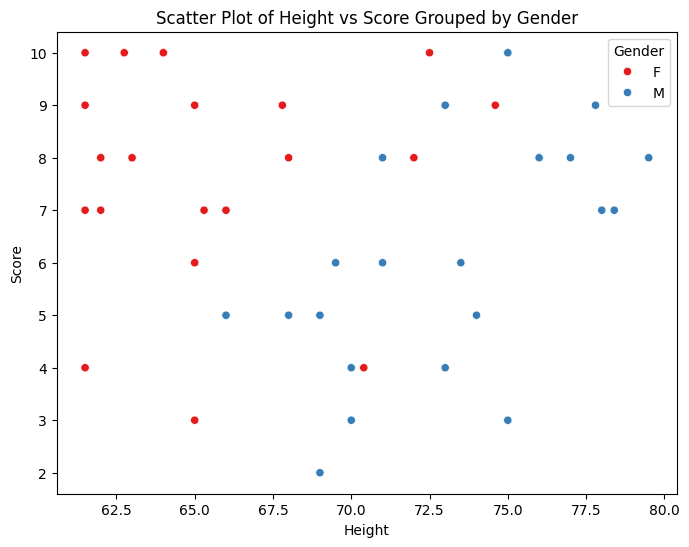

In [ ]:
# scatter plot between two variables (one categorical)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Height", y="Score", hue="Gender", data=df, palette="Set1")

# Adding title and labels
plt.title("Scatter Plot of Height vs Score Grouped by Gender")
plt.xlabel("Height")
plt.ylabel("Score")

# Show the plot
plt.show()

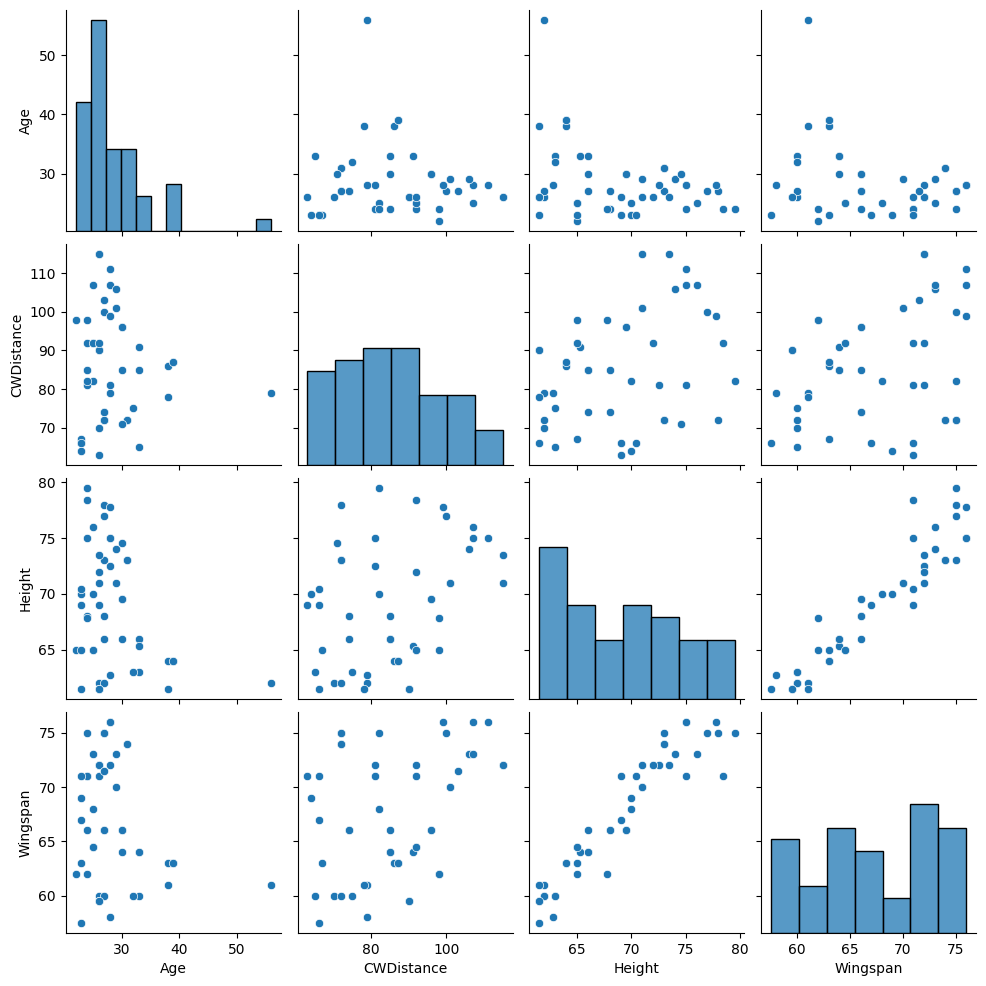

In [ ]:
# Pairplot: Scatterplot of "Age","CWDistance","Height",'Wingspan'
sns.pairplot(df[["Age","CWDistance","Height",'Wingspan']])

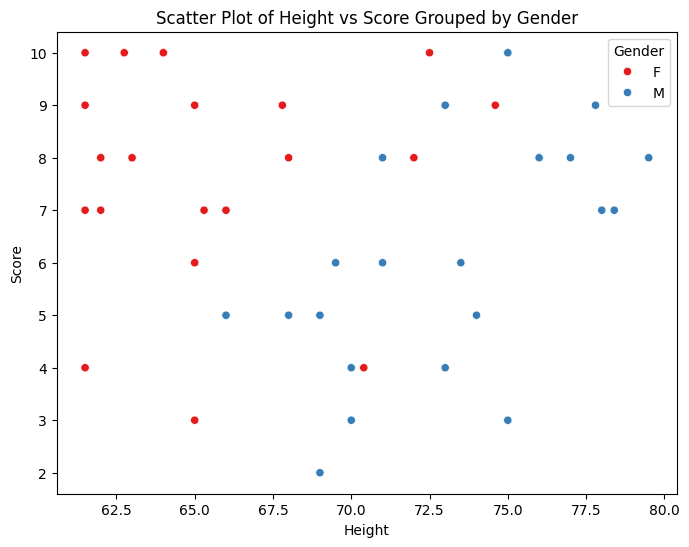

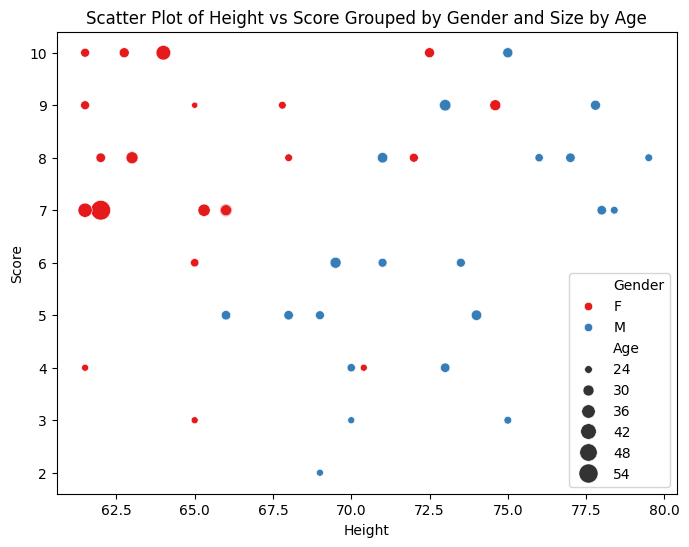

In [ ]:
# scatter plot between two variables grouped according to a categorical variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Height", y="Score", hue="Gender", data=df, palette="Set1")

# Adding title and labels
plt.title("Scatter Plot of Height vs Score Grouped by Gender")
plt.xlabel("Height")
plt.ylabel("Score")

# Show the plot
plt.show()
# scatter plot between two variables grouped according to a categorical variable and with size of markers
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Height", y="Score", hue="Gender", size="Age", data=df, palette="Set1", sizes=(20, 200))

# Adding title and labels
plt.title("Scatter Plot of Height vs Score Grouped by Gender and Size by Age")
plt.xlabel("Height")
plt.ylabel("Score")

# Show the plot
plt.show()


# Final remarks


- Visualizing your data using **tables**, **histograms**, **boxplots**, **scatter plots** and other tools is essential to carry put analysis and extract conclusions

- There are several ways to do the same thing

- The **Seaborn** package provides visualisations tools that allow to explore data from a graphical perspective


# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


2. Plot the histograms for each of the quantitative variables


3. Plot the boxplots for each of the quantitative variables


4. Plot the boxplots of the petal width grouped by type of flower


5. Plot the boxplots of the setal length grouped by type of flower


6. Provide a description (explaination from your observations) of each of the quantitative variables


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset
iris = load_iris()

# Create a DataFrame from the iris dataset
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable 'species' to the DataFrame
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first few rows of the dataset
df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


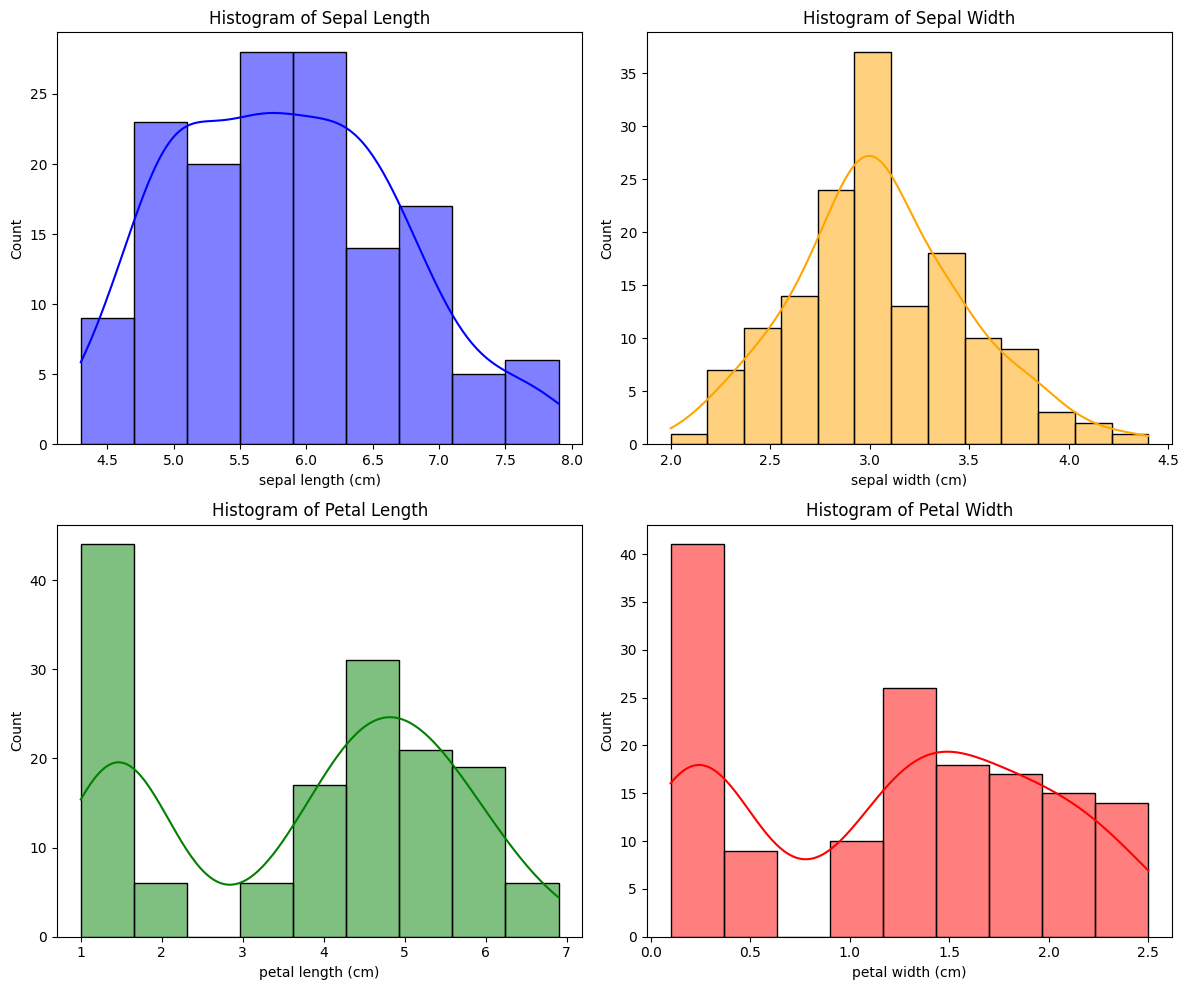

In [ ]:
# Set up the figure
plt.figure(figsize=(12, 10))

# Plot histograms for each quantitative variable
plt.subplot(2, 2, 1)
sns.histplot(df['sepal length (cm)'], kde=True, color='blue')
plt.title('Histogram of Sepal Length')

plt.subplot(2, 2, 2)
sns.histplot(df['sepal width (cm)'], kde=True, color='orange')
plt.title('Histogram of Sepal Width')

plt.subplot(2, 2, 3)
sns.histplot(df['petal length (cm)'], kde=True, color='green')
plt.title('Histogram of Petal Length')

plt.subplot(2, 2, 4)
sns.histplot(df['petal width (cm)'], kde=True, color='red')
plt.title('Histogram of Petal Width')

plt.tight_layout()
plt.show()


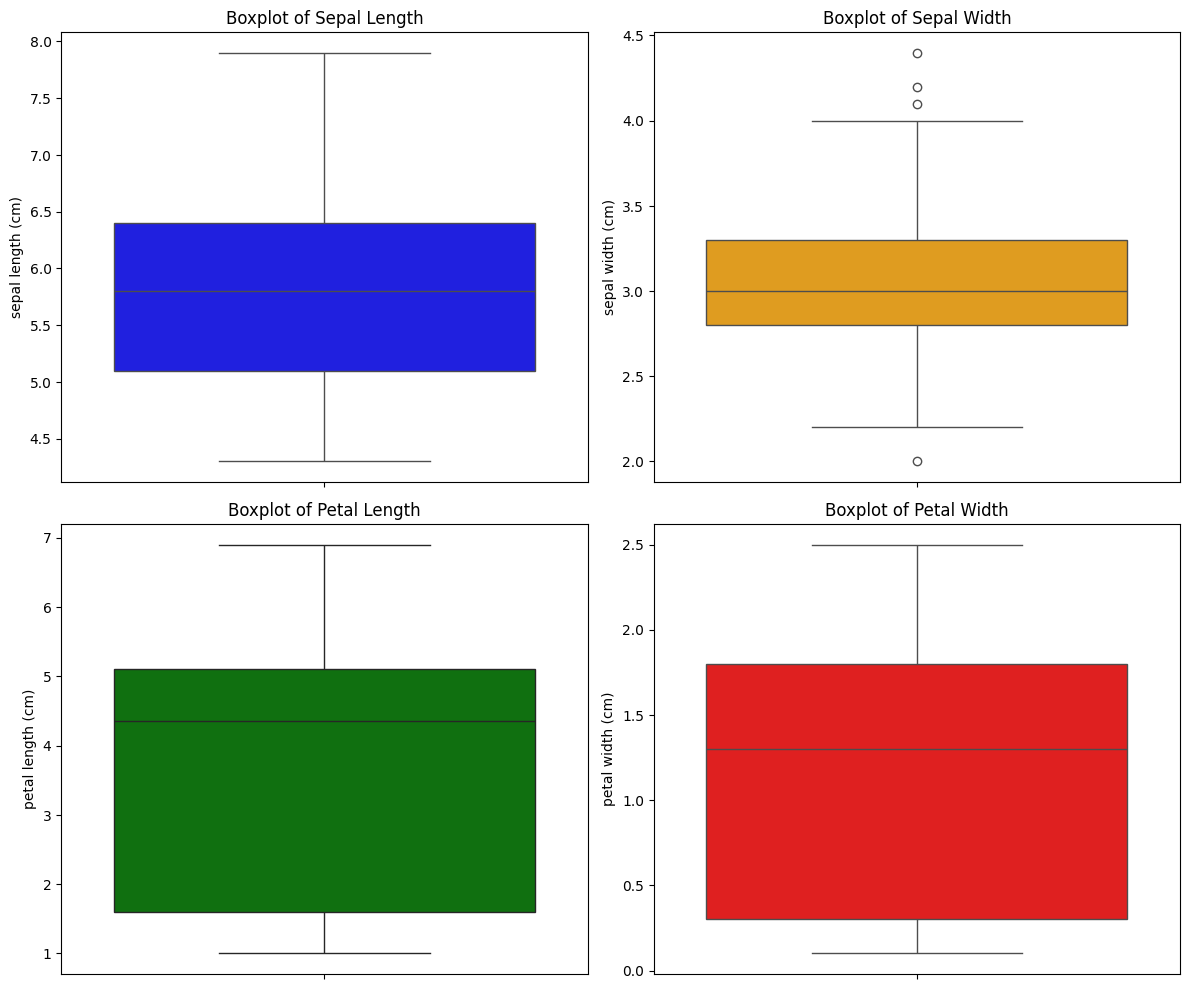

In [ ]:
# Set up the figure
plt.figure(figsize=(12, 10))

# Plot boxplots for each quantitative variable
plt.subplot(2, 2, 1)
sns.boxplot(y=df['sepal length (cm)'], color='blue')
plt.title('Boxplot of Sepal Length')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['sepal width (cm)'], color='orange')
plt.title('Boxplot of Sepal Width')

plt.subplot(2, 2, 3)
sns.boxplot(y=df['petal length (cm)'], color='green')
plt.title('Boxplot of Petal Length')

plt.subplot(2, 2, 4)
sns.boxplot(y=df['petal width (cm)'], color='red')
plt.title('Boxplot of Petal Width')

plt.tight_layout()
plt.show()


<ipython-input-110-33e9e6762da2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal width (cm)', data=df, palette='Set2')


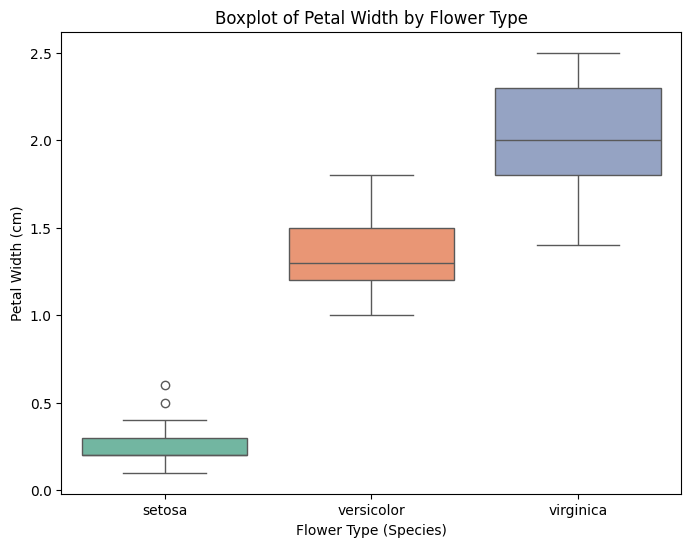

In [ ]:
# Set up the figure
plt.figure(figsize=(8, 6))

# Create the boxplot for Petal Width grouped by Species
sns.boxplot(x='species', y='petal width (cm)', data=df, palette='Set2')

# Add title and labels
plt.title('Boxplot of Petal Width by Flower Type')
plt.xlabel('Flower Type (Species)')
plt.ylabel('Petal Width (cm)')

# Show the plot
plt.show()



<ipython-input-111-07fbd33814b0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal length (cm)', data=df, palette='Set2')


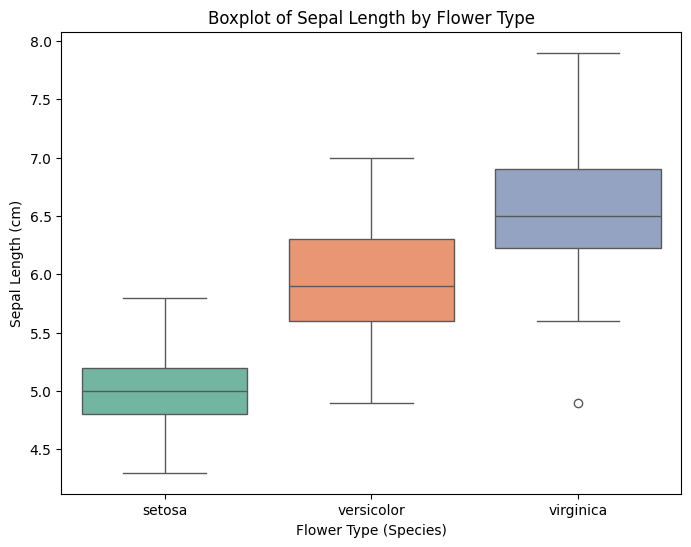

In [ ]:
# Set up the figure
plt.figure(figsize=(8, 6))

# Create the boxplot for Sepal Length grouped by Species
sns.boxplot(x='species', y='sepal length (cm)', data=df, palette='Set2')

# Add title and labels
plt.title('Boxplot of Sepal Length by Flower Type')
plt.xlabel('Flower Type (Species)')
plt.ylabel('Sepal Length (cm)')

# Show the plot
plt.show()


6. sepal length (cm) : El largo del sepalo en centimetro.
sepal width (cm):El ancho del sepalo en centimetro.
petal length (cm):El largo del petalo en centimetros.
petal width (cm):El ancho del petalo en centimetros.